In [1]:
import pandas as pd

In [4]:
data = []
with open("data/catkey.csv", "r") as f:
    for line in f:
        t = line.split(",")
        data.append({"category": t[0].strip(), "keyword": t[1].strip()})

In [5]:
df = pd.DataFrame(data)
df

,category,keyword
0,名言・ことば,言葉
1,名言・ことば,語った
2,名言・ことば,発言
3,ターニングポイント,転機
4,ターニングポイント,決断
5,ターニングポイント,挫折
6,ターニングポイント,屈辱
7,ターニングポイント,分岐点
8,ターニングポイント,出会い
9,ルーツ,恩師


In [6]:
from collections import defaultdict
data = defaultdict(list)
for i,d in df.iterrows():
    data[d['category']].append(d['keyword'])

In [7]:
categories = df['category'].unique().tolist()
categories

['名言・ことば', 'ターニングポイント', 'ルーツ', 'エピソード', '人として', '選手として']

In [8]:
import pickle
with open("data/category_keywords.pkl", "wb") as f:
    pickle.dump([categories, data], f)

In [2]:
import pickle
with open("data/category_keywords.pkl", "rb") as f:
    categories, keywords = pickle.load(f)

In [3]:
import cmppie

In [4]:
queries = ["イチロー", "ダルビッシュ有", "大谷翔平"]
target_names = ["player", "quote", "turning_point", "roots", "episode", "as_a_person", "as_a_player"]
executable_path = "gathering_notebook/chromedriver"
model, X, _, df = cmppie.execute(queries, categories, keywords, target_names, executable_path)

100%|██████████| 6/6 [00:36<00:00,  6.15s/it]
/root/work/detect_fakenews_jp/notebook/scraping_notebook/cmppie.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[col] = X[col]/df[base_column]


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(X, queries, keywords, num):
    try:
        plt.title(queries[num])
        plt.pie(X[num], labels=keywords)
        return True
    except:
        return False

In [12]:
for i in range(X.shape[0]):
    X[i] += 0.1

In [13]:
for i in range(X.shape[0]):
    X[i] *= 10.0

True

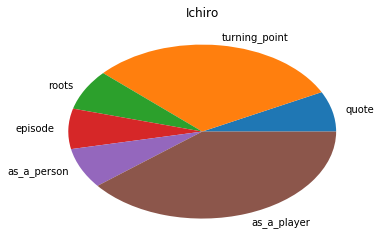

In [14]:
plot(X, ["Ichiro", "Darvish", "Otani"], target_names[1:], num=0)

True

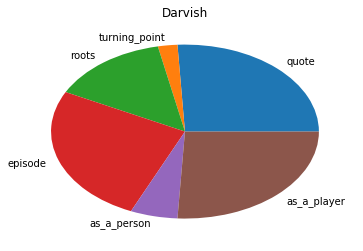

In [15]:
plot(X, ["Ichiro", "Darvish", "Otani"], target_names[1:], num=1)

True

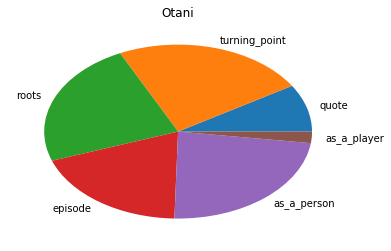

In [16]:
plot(X, ["Ichiro", "Darvish", "Otani"], target_names[1:], num=2)

In [9]:
df

,player,quote,turning_point,roots,episode,as_a_person,as_a_player,base_count
0,イチロー,396333.333333,58266.666667,61378.333333,121500.000000,304875.00,595833.333333,2100000
1,ダルビッシュ有,192300.000000,16450.000000,28821.666667,98567.142857,117621.25,262150.000000,752000
2,大谷翔平,814333.333333,158083.333333,183270.000000,452114.285714,868750.00,915000.000000,3880000


In [10]:
for col in target_names[1:]:
    print("[{}]".format(col))
    print(df[col]/df['base_count'])
    print()

[quote]
0    0.188730
1    0.255718
2    0.209880
dtype: float64

[turning_point]
0    0.027746
1    0.021875
2    0.040743
dtype: float64

[roots]
0    0.029228
1    0.038327
2    0.047235
dtype: float64

[episode]
0    0.057857
1    0.131073
2    0.116524
dtype: float64

[as_a_person]
0    0.145179
1    0.156411
2    0.223905
dtype: float64

[as_a_player]
0    0.283730
1    0.348604
2    0.235825
dtype: float64



In [17]:
print(sum(X[0]))
print(sum(X[1]))
print(sum(X[2]))

13.359339004159253
42.47985469792579
47.17008790847837
